# IBEX35 Time Series

In this Jupyter Notebook we will analyse the time series of the closing value of the Spanish index IBEX35.

Data has been found in https://es.finance.yahoo.com/quote/%5EIBEX/history/

The study will be centered in the absolute value of the difference in the closing proce between two consecutive days.

### Read and clean the data

We are going to read the data from the file downloaded and clean it to keep just the values we are interested in.

#### Read the file

In [1]:
import pandas as pd
# read the data
data = pd.read_csv('../data/ibex.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-15,9834.599609,9913.400391,9764.099609,9865.299805,9865.290039,10256100.0
1,1993-02-16,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-02-17,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-02-18,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-02-19,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7169,2020-11-27,8069.100098,8190.700195,8054.399902,8190.700195,8190.700195,415126100.0
7170,2020-11-30,8130.600098,8165.200195,8075.399902,8076.899902,8076.899902,544905000.0
7171,2020-12-01,8112.700195,8176.399902,8100.200195,8140.799805,8140.799805,284946100.0
7172,2020-12-02,8111.100098,8226.200195,8104.200195,8220.799805,8220.799805,310837500.0


#### Clean the data

In [2]:
# I will use only the close value so ill drop the rest of the colums and ill keep just the date and the close.
data = data.loc[:, ['Date', 'Close']]
# and we want the date to be a date and to be the index of our dataframe
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Close
0,1993-02-15,9865.299805
1,1993-02-16,NaN
2,1993-02-17,NaN
3,1993-02-18,NaN
4,1993-02-19,NaN
...,...,...
7169,2020-11-27,8190.700195
7170,2020-11-30,8076.899902
7171,2020-12-01,8140.799805
7172,2020-12-02,8220.799805


In [3]:
# now ill check where the NaNs are
nan_index = data['Close'].isnull().to_numpy().nonzero()[0]
nan_index

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
         35,   38,   39,  171,  185,  210,  212,  224,  233,  294,  295,
        315,  432,  446,  452,  471,  473,  485,  494,  545,  563,  564,
        575,  576,  585,  651,  693,  707,  732,  734,  745,  750,  818,
        819,  837,  838,  847,  913,  969,  994, 1006, 1007, 1012, 1015,
       1073, 1074, 1098, 1099, 1108, 1159, 1174, 1255, 1267, 1268, 1273,
       1276, 1328, 1343, 1344, 1345, 1359, 1380, 1475, 1516, 1528, 1529,
       1533, 1534, 1537, 1598, 1599, 1600, 1736, 1750, 1775, 1777, 1789,
       1794, 1798, 1874, 1875, 1880, 1998, 2012, 2037, 2039, 2050, 2051,
       2055, 2129, 2130, 2141, 2217, 2236, 2259, 2298, 2310, 2311, 2312,
       2315, 2316, 2379, 2380, 2402, 2478, 2534, 2559, 2571, 2572, 2573,
       2576, 2577, 2580, 2654, 2655, 2663, 2739, 28

In [4]:
# lets check what dates are those
data['Date'][nan_index].tail(20)

2837   2003-12-31
2838   2004-01-01
2841   2004-01-06
2909   2004-04-09
2910   2004-04-12
3000   2004-08-16
3041   2004-10-12
3055   2004-11-01
3080   2004-12-06
3082   2004-12-08
3094   2004-12-24
3099   2004-12-31
3103   2005-01-06
3159   2005-03-25
3160   2005-03-28
3355   2005-12-26
3615   2007-01-01
3867   2007-12-24
6170   2017-01-02
6932   2019-12-25
Name: Date, dtype: datetime64[ns]

In [5]:
# we can see that there are a bunch of rows at the begginig without data and the rest are holiday days
# for example: 2005-12-26 and 2017-01-02 are bank holidays because 2005-12-25 and 2017-01-01 were Sundays
# so I will just not use those rows because they the markets were not open those days
# also I will just use data from 1994 onwards
data = data.dropna()
data = data.set_index('Date')
data = data.loc[pd.datetime(1994,1,1):]
data

,Close
Date,
1994-01-03,3654.500000
1994-01-04,3630.300049
1994-01-05,3621.199951
1994-01-07,3636.399902
1994-01-10,3660.600098
...,...
2020-11-27,8190.700195
2020-11-30,8076.899902
2020-12-01,8140.799805


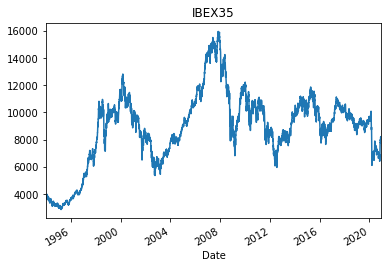

In [6]:
# now lets plot the time serie
data['Close'].plot(title='IBEX35')

### Transform the data

Wee are not going to study the serie like it is, we will study the daily change in the absolute value of the closing price, so we need to calculate that change.

In [7]:
# calculate the diference with the previous day
data = data.diff().apply(abs)
# the firs line will be a nan so we are just going to delete it
data = data.dropna()
data=data.rename(columns = {'Close':'abs_diff'})
data

,abs_diff
Date,
1994-01-04,24.199951
1994-01-05,9.100098
1994-01-07,15.199951
1994-01-10,24.200196
1994-01-11,51.799804
...,...
2020-11-27,86.100097
2020-11-30,113.800293
2020-12-01,63.899903


### Discretize the data

I am going to discretize the data with intervals of 10, so:

[0, 10) -> 0

[10, 20) -> 10

...

In [8]:
# lets discretize it with intervals of 10
data = data.apply(lambda x: x/10).astype('int16')*10
data

,abs_diff
Date,
1994-01-04,20
1994-01-05,0
1994-01-07,10
1994-01-10,20
1994-01-11,50
...,...
2020-11-27,80
2020-11-30,110
2020-12-01,60


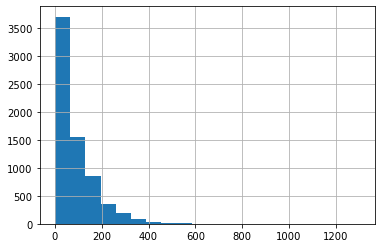

In [9]:
# lets do a histogram to see wich values are the most common
data['abs_diff'].hist(bins=20)

We can see that most of the days the change is small, close to 0.

### PST Vocabulary
The vocabulary of the PST are the different states the time serie can have.

We had a continuous time serie and we discretized it with intervals of 10 so the vocabulary of our PST is {0, 10, 20, ..., 900)

In [10]:
# lets see what are the most common states
data['abs_diff'].value_counts()

0      653
10     650
20     621
30     521
40     464
      ... 
740      1
700      1
680      1
600      1
900      1
Name: abs_diff, Length: 74, dtype: int64

We can see that we have 74 states and the most common one are 0 and 10 with 650 or more occurencies.

### PST States

The states are subsequeces of of the time serie that appears an enough number of times.

Order 1 states are the same than the vocabulary (0, 10, 20, ...), lets study orde2 and 3.

The order 2 states and the order 3 states are: 

In [11]:
# The different states in different orders of the series will be formed for columns.
# Order 2 will be colum 1 and 2, order 3 will be column 1, 2 and 3

data['abs_diff+1'] = data['abs_diff']
data['abs_diff+2'] = data['abs_diff']
data['abs_diff+1'][:-1] = data['abs_diff'][1:]
data['abs_diff+2'][:-1] = data['abs_diff+1'][1:]
data

,abs_diff,abs_diff+1,abs_diff+2
Date,,,
1994-01-04,20,0,10
1994-01-05,0,10,20
1994-01-07,10,20,50
1994-01-10,20,50,30
1994-01-11,50,30,0
...,...,...,...
2020-11-27,80,110,60
2020-11-30,110,60,80
2020-12-01,60,80,20


Now lets see how many of these states of order 2 and 3 we have and which ones are the mos common ones.

In [12]:
from collections import Counter
# we will get the states combining the colunm abs_diff and abs_diff+1 in a string and grouping by this column
data.groupby(['abs_diff', 'abs_diff+1'])['abs_diff'].count().sort_values(ascending=False).head(20)

abs_diff  abs_diff+1
0         20            88
          0             82
20        0             82
10        0             81
0         10            79
10        10            78
          20            76
30        10            72
20        20            71
          10            69
0         30            67
30        0             66
10        30            63
40        10            58
20        30            55
0         40            50
30        20            47
10        50            46
30        30            45
20        40            45
Name: abs_diff, dtype: int64

In [13]:
# we will get the states combining the colunm abs_diff, abs_diff+1 and abs_diff+2 in a string and grouping by this column
data.groupby(['abs_diff', 'abs_diff+1', 'abs_diff+2'])['abs_diff'].count().sort_values(ascending=False).head(40)

abs_diff  abs_diff+1  abs_diff+2
10        0           20            18
20        0           0             18
          20          10            17
0         20          0             15
10        20          20            15
0         10          20            15
          30          10            14
20        10          0             14
0         0           20            14
          20          10            14
10        10          0             14
          20          0             14
          0           0             13
                      10            13
0         10          10            13
20        20          30            12
0         20          20            12
10        0           30            12
          10          10            12
30        20          0             12
          10          20            12
20        0           10            12
                      20            12
          20          0             12
0         10          0        

We can see from the results that both for those of order 2 and for those of order 3 the lower values of our states (0, 10, 20, 30) are the most common one. That is not strange because as we saw before they are the most common values of our time serie.

### Transition matrix

The transition matrix is a square matrix used to describe the transitions of a Markov chain. Each of its entries is a nonnegative real number representing a probability.

If the probability of been in a state s_i after a state s_j is p(s_i|s_j) then the item in the transition matrix aij is described as p(s_i|s_j). If we have the states a, b and c the transition matrix would be:

|   | a       | b       | c       |
|---|---------|---------|---------|
| a | p(a\|a) | p(b\|a) | p(c\|a) |
| b | p(a\|b) | p(b\|b) | p(c\|b) |
| c | p(a\|c) | p(b\|c) | p(c\|c) |

Now we are going to see an example for the subsequence (0, 0, 0).

In [14]:
# the data this group contain is
data.groupby(['abs_diff', 'abs_diff+1', 'abs_diff+2']).get_group((0,0,0))

,abs_diff,abs_diff+1,abs_diff+2
Date,,,
1995-05-16,0,0,0
1995-06-02,0,0,0
1995-06-14,0,0,0
1996-02-16,0,0,0
1996-05-13,0,0,0
1996-11-07,0,0,0
2005-05-13,0,0,0
2010-10-19,0,0,0
2017-01-18,0,0,0


In [15]:
# Now lest see what is the next value for those subsequences
data['abs_diff+3'] = data['abs_diff']
data['abs_diff+3'][:-1] = data['abs_diff+2'][1:]
data000 = data.groupby(['abs_diff', 'abs_diff+1', 'abs_diff+2']).get_group((0,0,0))
data000

,abs_diff,abs_diff+1,abs_diff+2,abs_diff+3
Date,,,,
1995-05-16,0,0,0,10
1995-06-02,0,0,0,10
1995-06-14,0,0,0,10
1996-02-16,0,0,0,50
1996-05-13,0,0,0,40
1996-11-07,0,0,0,30
2005-05-13,0,0,0,150
2010-10-19,0,0,0,30
2017-01-18,0,0,0,70


In [16]:
# calculate the frequecy for each value
data000.groupby(['abs_diff+3'])['abs_diff'].count().sort_values(ascending=False).apply(lambda x: x/data000.shape[0])

abs_diff+3
10     0.3
30     0.2
150    0.1
70     0.1
50     0.1
40     0.1
20     0.1
Name: abs_diff, dtype: float64

The transition matrix for the state (0, 0, 0) would be:

| State   | Count | Next state | 10  | 30  | 150 | 70  | 50  | 40  | 20  |
|---------|-------|------------|-----|-----|-----|-----|-----|-----|-----|
| (0,0,0) | 10    |Probability | 0.3 | 0.2 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 |

The probabilities that do not appear in the table are 0.

### Conclusions

On the one hand, PST may not be the best method to "learn" from the data of this example because the vocabulary on this example is very big and sparse.

Most of the useful states will be of length 1 or 2 with some of length 3 (and I doubt there is any with lenght 4 given the frequecy outpputed by the subsequences of order 3).

On the other hand, the frequency of the states with low numbers like 0, 10 and 20 are very frequent so we could mainly those. This would have a drawback and it is that with this approach we would not be able to predict peaks beacuse we excluded them from our vocabulary.

Maybe one solution for this would be a non linear discretization, something like:

[0, 3) -> 1

[3, 10) -> 2

[10, 20) -> 3

...

[90, 100) -> 11

[100, 150) -> 12

[150, 200) -> 13

...

With this kind of discretization we would be able to detect peaks but no exactly their size. The prediction of the size would depend on the resolution of the discretization in those values.